# Ejercicio 1

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('breast_cancer.csv')
df = df.drop(columns=['id', 'Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

Por lo tanto, los tumores Benignos son 0 y los Malignos son 1.

# Ejercicio 2

In [3]:
datos_benignos = df.query('diagnosis == 0')
datos_malignos = df.query('diagnosis == 1')

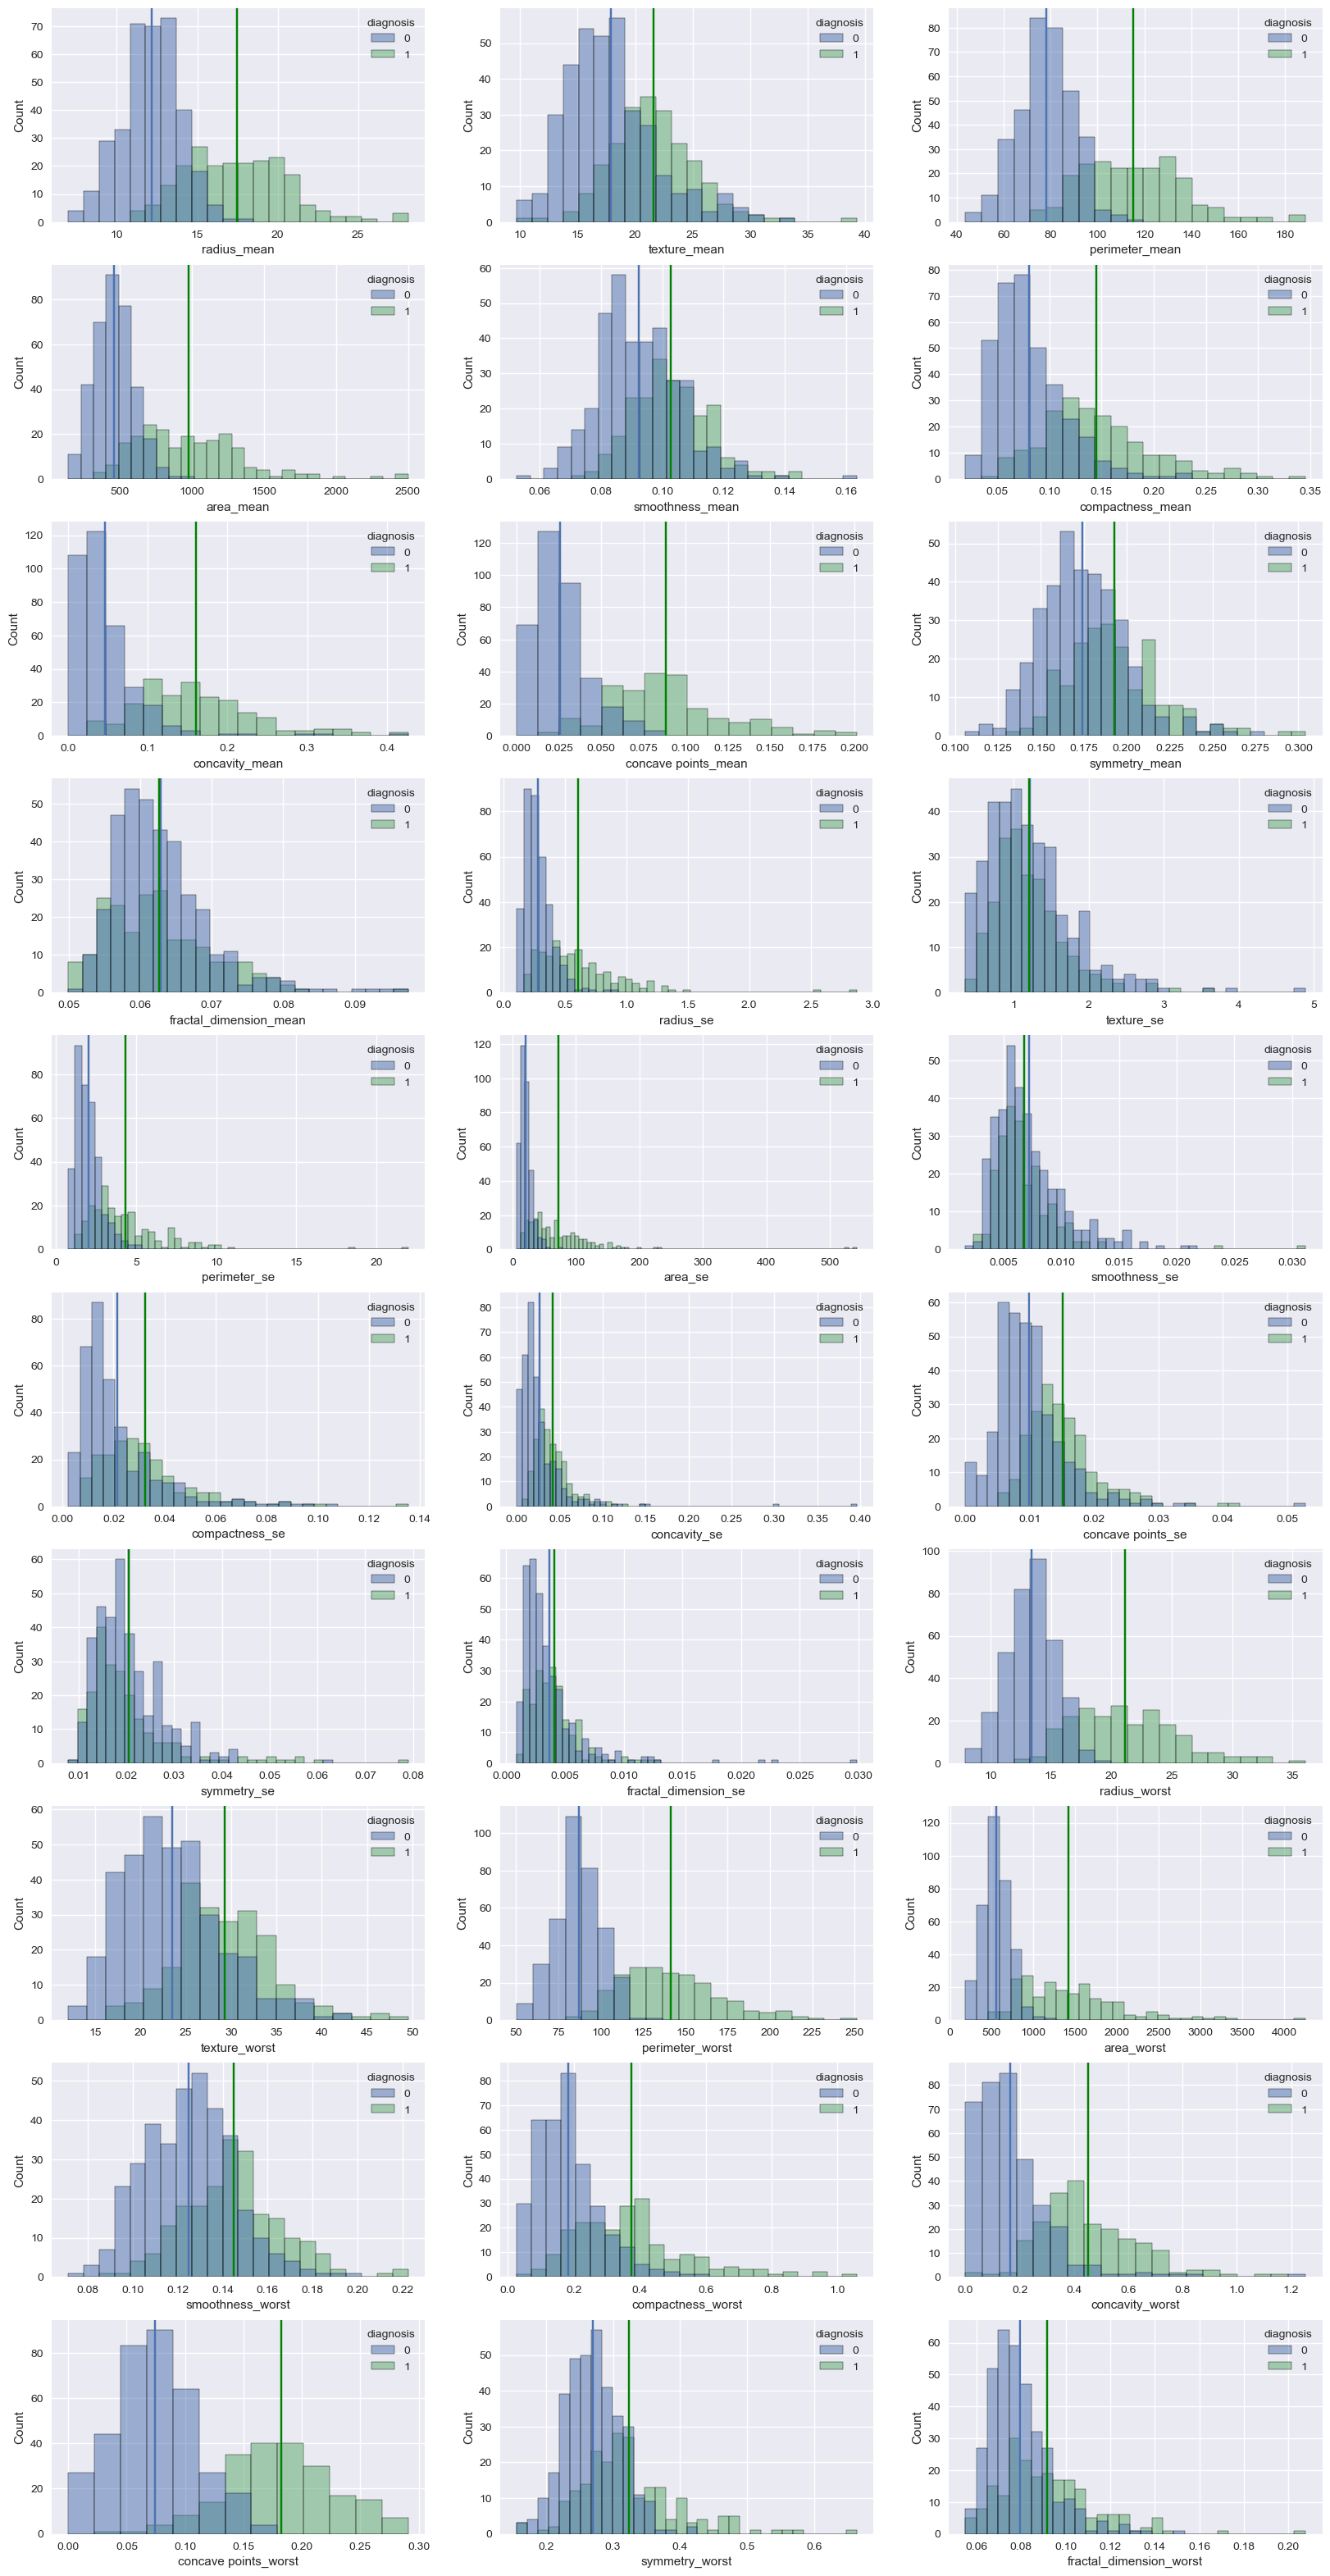

In [4]:
fig, axis = plt.subplots(10, 3, figsize=(20, 40))

idx_columna_a_graficar = 0
columnas = df.columns[1:]

for i in range(10):
    for j in range(3):
        variable_a_analizar = columnas[idx_columna_a_graficar]
        media_var_benigno = datos_benignos[variable_a_analizar].mean()
        media_var_maligno = datos_malignos[variable_a_analizar].mean()

        sns.histplot(data=df, x=variable_a_analizar, hue='diagnosis', ax=axis[i, j])
        axis[i, j].axvline(media_var_benigno)
        axis[i, j].axvline(media_var_maligno, color='green')

        idx_columna_a_graficar += 1


- Segun los graficos, las variables que tienen la mayor separacion entre celulas beningnas y malignas son:
    - radius_mean
    - perimeter_mean
    - area_mean
    - compactness_mean
    - concavity_mean
    - concave_points_mean
    - radius_worst
    - texture_worst
    - perimeter_worst
    - area_worst
    - smoothness_worst
    - compactness_worst
    - concavity_worst
    - concave_points_worst

# Ejercicio 3

In [5]:
def histogram_overlap(df, attribute, target, perc=100):
    empirical_lower_bound = np.floor(df[attribute].min())
    empirical_upper_bound = np.ceil(df[attribute].max())
    tmp_hist_holder = dict()

    for unique_value in np.unique(df[target]):
        tmp, _ = np.histogram(df[df[target] == unique_value][attribute], bins=perc,
                              range=[empirical_lower_bound, empirical_upper_bound])
        tmp_hist_holder["h_"+str(unique_value)] = tmp

    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_0"])
    intersection = np.true_divide(np.sum(get_minima), np.sum(tmp_hist_holder["h_0"]))

    return intersection

In [14]:
sobreposicion_variables = []
for columna in df.columns[1:]:
    sobreposicion_columna = histogram_overlap(df, columna, 'diagnosis')
    sobreposicion_variables.append([columna, sobreposicion_columna])

resumen_sobreposicion = pd.DataFrame(sobreposicion_variables, columns=['variable', 'sobreposicion'])
resumen_sobreposicion = resumen_sobreposicion.sort_values('sobreposicion', ascending=False)

In [15]:
resumen_sobreposicion

,variable,sobreposicion
19,fractal_dimension_se,0.593838
14,smoothness_se,0.591036
9,fractal_dimension_mean,0.588235
18,symmetry_se,0.568627
11,texture_se,0.549020
15,compactness_se,0.523810
4,smoothness_mean,0.521008
8,symmetry_mean,0.509804
17,concave points_se,0.507003
29,fractal_dimension_worst,0.492997


De los resultados anteriores se obtiene que las 10 variables menos solapadas son:
|    | variable             |   sobreposicion |
|---:|:---------------------|----------------:|
| 13 | area_se              |        0.207283 |
|  0 | radius_mean          |        0.184874 |
|  6 | concavity_mean       |        0.182073 |
|  3 | area_mean            |        0.179272 |
|  2 | perimeter_mean       |        0.168067 |
| 27 | concave points_worst |        0.140056 |
|  7 | concave points_mean  |        0.137255 |
| 20 | radius_worst         |        0.134454 |
| 22 | perimeter_worst      |        0.128852 |
| 23 | area_worst           |        0.128852 |

Por lo tanto, son buenos candidatos para ser utilizadas en un algoritmo de Support Vector Machine.

# Ejercicio 4

In [36]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma = [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

grilla = {
    'C': C,
    'gamma': gamma
}

modelo_grilla = GridSearchCV(SVC(kernel='linear'), param_grid=grilla, cv=10, n_jobs=-1, verbose=5)

In [37]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']

X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_pre)
X_test = scaler.transform(X_test_pre)

modelo_grilla.fit(X_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             verbose=5)

In [61]:
print(f'Por lo tanto, los mejores parametros para el modelo son:\n{modelo_grilla.best_estimator_}')

Por lo tanto, los mejores parametros para el modelo son:
SVC(C=0.1, gamma=1e-07, kernel='linear')


## Heatmap de resultados del CV

In [58]:
resultados_cv = pd.DataFrame(modelo_grilla.cv_results_)
resultados_para_heatmap = resultados_cv.loc[:, 'params':'std_test_score'].set_index('params')

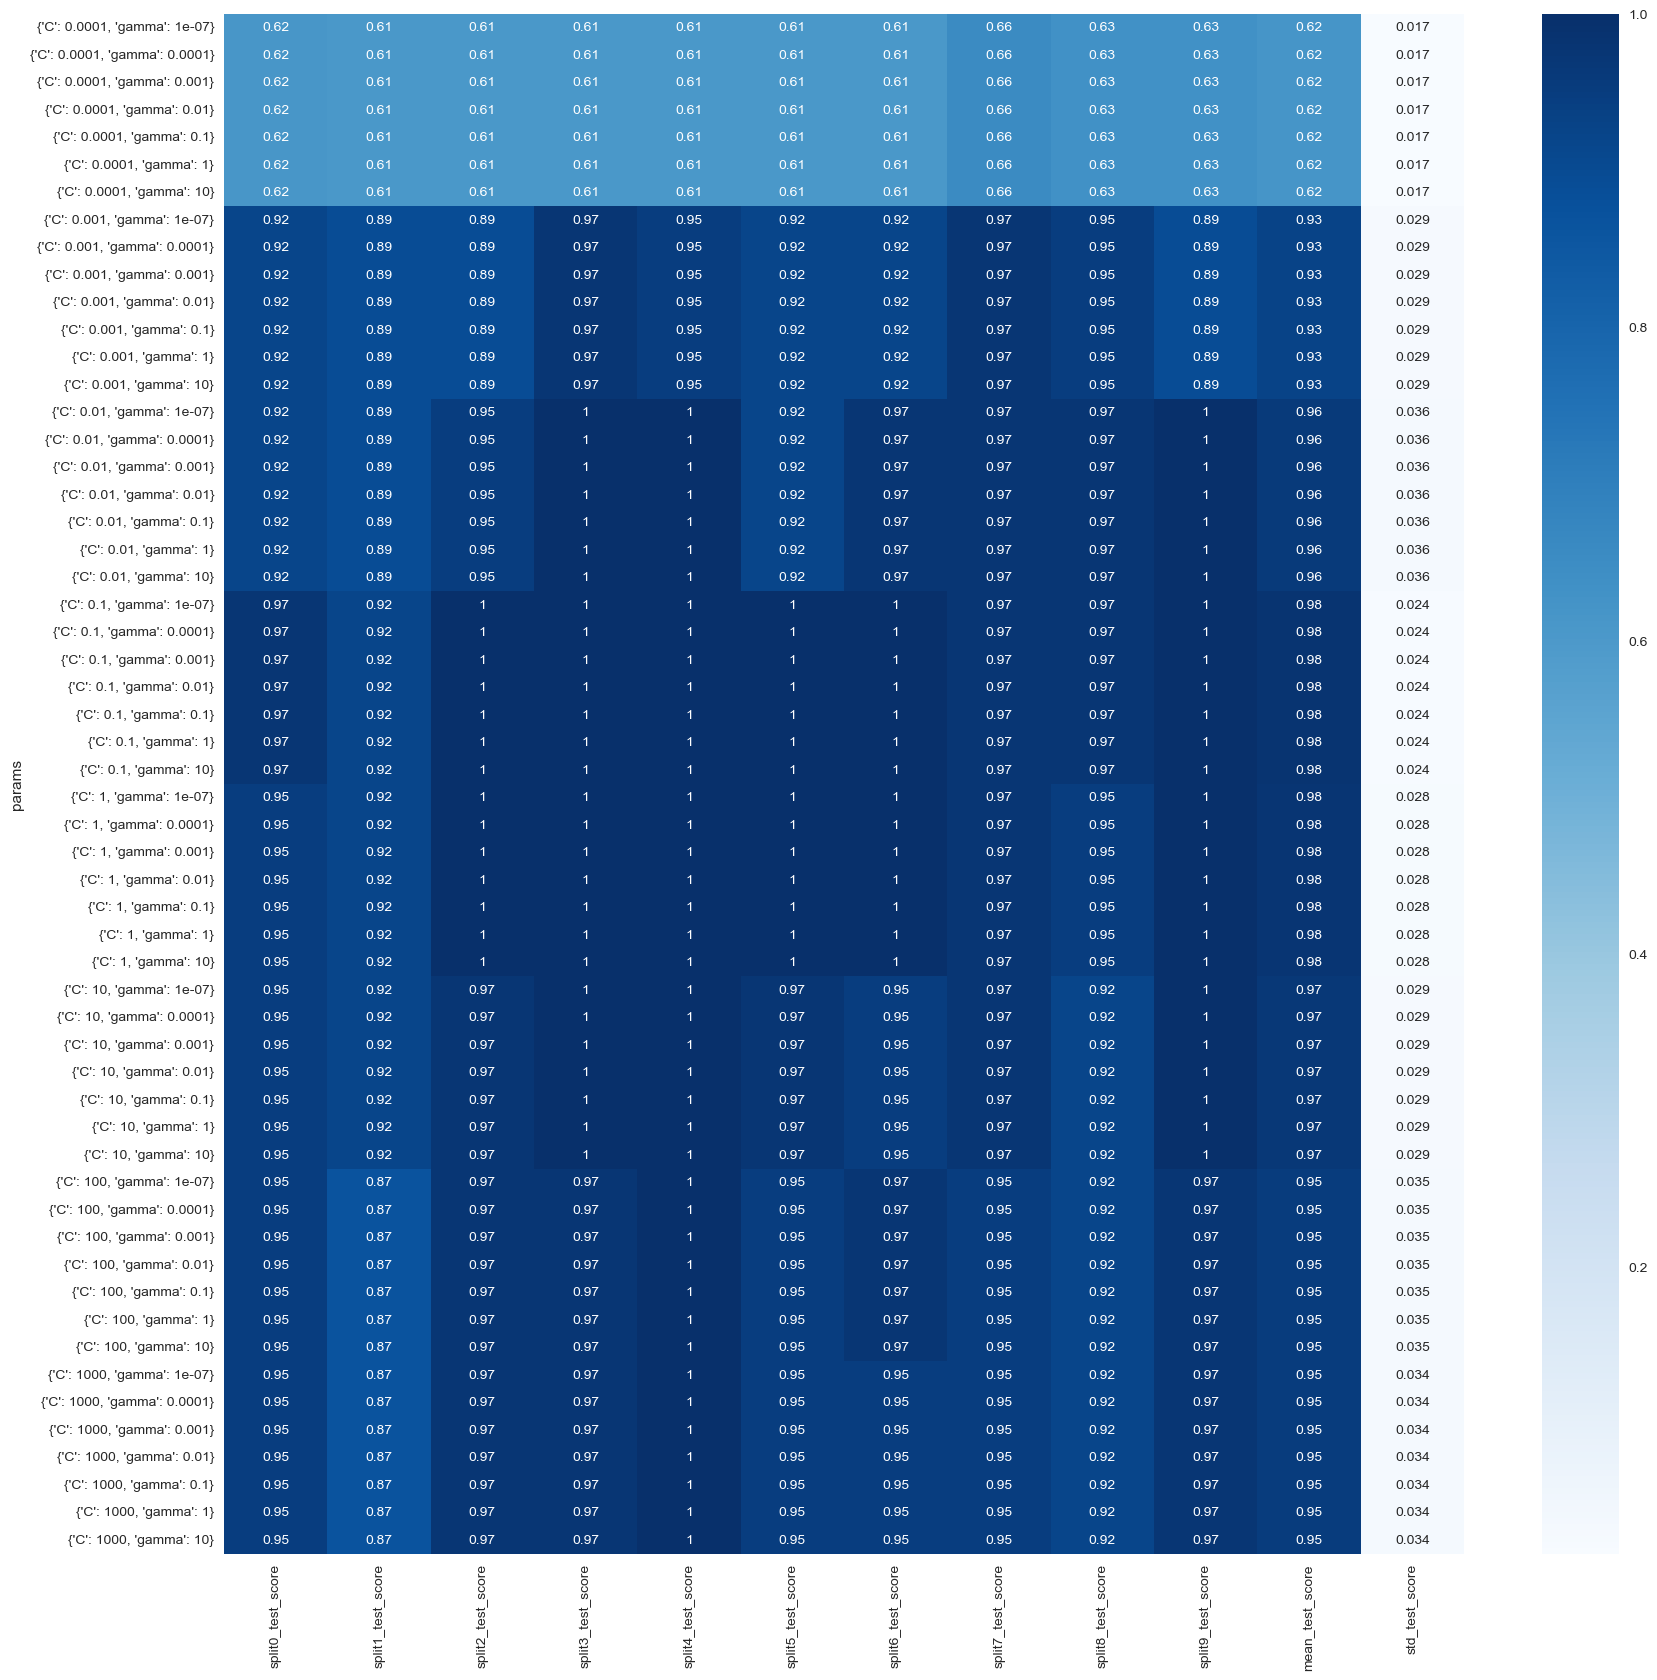

In [59]:
fig, axis = plt.subplots(figsize=(20, 20))
sns.heatmap(resultados_para_heatmap, cmap='Blues', annot=True, ax=axis)
plt.show()

- Como se puede observar, los mejores resultados se obtiene cuando C = 0.1 o 1. Sin embargo, al comparar las desviaciones estandar, se puede observar que los testeos
con C = 0.1 presentan valores menores. Por lo tanto, al utilizar C = 0.1 se tienen modelos mas estables. Por otro lado, al comparar los valores de gamma (utilizando C = 0.1),
se puede observar que todos presentan metricas de mean_test_score y std_test_score identicas. Por lo tanto, es necesario observar otras metricas para decidir cual valor de
gamma es mejor (por ejemplo, tiempos de corrida).

- El modelo presenta un desempeno eficiente (mean_test_score = 0.98) al utilizar C = 0.1 o 1, y cualquiera de los valores de gamma propuestos.